# Pandas Basics — Part 1 — In-Class

In today's class, we're going to introduce some of the basics of [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html), a powerful Python library for working with tabular data like CSV files.

We will cover how to:

* Import Pandas
* Read in a CSV file
* Calculate summary statistics and frequencies
* Explore and filter data
* Make simple plots and data visualizations

___

## Dataset
### The Bellevue Almshouse Dataset

> Nineteenth-century immigration data was produced with the express purpose of reducing people to bodies; bodies to easily quantifiable aspects; and assigning value to those aspects which proved that the marginalized people to who they belonged were worth less than their elite counterparts.

> — Anelise Shrout, ["(Re)Humanizing Data"](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/)


The dataset that we're working with in this lesson is the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/), created by historian and DH scholar Anelise Shrout. It includes information about Irish-born immigrants who were admitted to New York City's Bellevue Almshouse in the 1840s.

The Bellevue Almshouse was part of New York City's public health system, a place where poor, sick, homeless, and otherwise marginalized people were sent — sometimes voluntarily and sometimes forcibly. Devastated by widespread famine in Ireland, many Irish people fled their homes for New York City in the 1840s, and many of them ended up in the Bellevue Almshouse.

We're using the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/) to practice data analysis with Pandas because we want to think deeply about the consequences of reducing human life to data. As Shrout argues in [her essay](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/), this data purposely reduced people to bodies and "easily quantifiable aspects" in order to devalue their lives, potentially enacting "both epistemic and physical violence" on them.

___

## Import Pandas


> If you installed Python with Anaconda, you should already have Pandas installed. If you did not install Python with Anaconda, see [Pandas Installation](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html).


To use the Pandas library, we first need to `import` it.

In [1]:
import pandas as pd

The above `import` statement not only imports the Pandas library but also gives it an alias or nickname — `pd`. This alias will save us from having to type out the entire words `pandas` each time we need to use it. Many Python libraries have commonly used aliases like `pd`.

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [2]:
pd.options.display.max_rows = 200

## Read in CSV File

To read in a CSV file, we will use the method `pd.read_csv()` and insert the name of our desired file path. 

In [6]:
pd.read_csv('Bellevue_Almshouse_Dataset.csv', delimiter=',', encoding='utf-8')

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe), one of the two main data structures in Pandas. A DataFrame looks and acts a lot like a spreadsheet, but it has special powers and functions that we will discuss below and in the next few lessons.

| Pandas objects | Explanation                         |
|----------|-------------------------------------|
| `DataFrame`    | Like a spreadsheet, 2-dimensional    |
| `Series`      | Like a column, 1-dimensional                     |

When reading in the CSV file, we also specified a `delimiter` and `encoding`. The `delimiter` specifies the character that separates or "delimits" the columns in our dataset. For CSV files, the delimiter will most often be a comma. (CSV is short for *Comma Separated Values*.) Sometimes, however, the delimiter of a CSV file might be a tab (`\t`) or, more rarely, another character.

We assign the DataFrame to a variable called `bellevue_df`. It is common convention to name DataFrame variables `df`, but we want to be a bit more specific. 

In [3]:
bellevue_df = pd.read_csv('Bellevue_Almshouse_Dataset.csv', delimiter=',', encoding='utf-8')

## Begin to Examine Data

We can display a DataFrame in a Jupyter notebook simply by running a cell with the variable name of the DataFrame.

In [4]:
bellevue_df

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,sender1,sender2
0,1847-04-17,Mary,Gallagher,Mary Gallagher,28.0,f,recent emigrant,married,Child Alana 10 days,Hospital,superintendent,hd. gibbens
1,1847-04-08,John,Sanin (?),John Sanin (?),19.0,m,recent emigrant,laborer,Catherine 2 mo,NaN,george w. anderson,edward witherell
2,1847-04-17,Anthony,Clark,Anthony Clark,60.0,m,recent emigrant,laborer,Charles Riley afed 10 days,Hospital,george w. anderson,edward witherell
3,1847-04-08,Lawrence,Feeney,Lawrence Feeney,32.0,m,recent emigrant,laborer,Child,NaN,george w. anderson,james donnelly
4,1847-04-13,Henry,Joyce,Henry Joyce,21.0,m,recent emigrant,NaN,Child 1 mo,NaN,george w. anderson,edward witherell
...,...,...,...,...,...,...,...,...,...,...,...,...
9593,1846-05-23,Joseph,Aton,Joseph Aton,69.0,m,NaN,shoemaker,NaN,NaN,[blank],NaN
9594,1847-06-17,Mary,Smith,Mary Smith,47.0,f,NaN,NaN,NaN,Hospital Ward 38,[blank],NaN
9595,1847-06-22,Francis,Riley,Francis Riley,29.0,m,lame,superintendent,NaN,NaN,[blank],NaN
9596,1847-07-02,Martin,Dunn,Martin Dunn,4.0,m,NaN,NaN,NaN,NaN,[blank],NaN


### ❓🧐  What do you notice about the data already?

*Jot down some observations (double-click to type)*

## Begin to Examine Patterns

### Select Columns

To select a column from the DataFrame, we will type the name of the DataFrame followed by square brackets and a column name in quotations marks.

In [8]:
bellevue_df['age']

0       28.0
1       19.0
2       60.0
3       32.0
4       21.0
        ... 
9593    69.0
9594    47.0
9595    29.0
9596     4.0
9597    32.0
Name: age, Length: 9598, dtype: float64

Technically, a single column in a DataFrame is a [*Series* object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro).

In [6]:
type(bellevue_df['age'])

pandas.core.series.Series

| Pandas method | Explanation                         |
|----------|-------------------------------------|
| `.sum()`      | Sum of values                       |
| `.mean()`     | Mean of values                      |
| `.median()`   | Median of values         |
| `.min()`      | Minimum                             |
| `.max()`      | Maximum                             |
| `.mode()`     | Mode                                |
| `.std()`      | Unbiased standard deviation         |
| `.count()`    | Total number of non-blank values    |
| `.value_counts()` | Frequency of unique values |

### ❓🧐  How old are people on average?

In [26]:
bellevue_df['age'].mean()

30.337039170506916

### ❓🧐  How old is the oldest person?

In [27]:
bellevue_df['age'].max()

97.0

### ❓🧐  How young is the youngest person?

In [28]:
bellevue_df['age'].min()

0.08

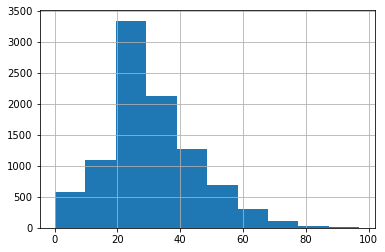

In [9]:
bellevue_df['age'].hist()

### ❓🧐  What are the most common professions among the Bellevue Irish immigrants?

To count the values in a column, we can use the `.value_counts()` method.

In [10]:
bellevue_df['profession'].value_counts()

laborer                        3116
married                        1586
spinster                       1522
widow                          1055
shoemaker                       158
tailor                          116
blacksmith                      104
mason                            99
weaver                           66
carpenter                        65
baker                            48
waiter                           41
clerk                            28
stone cutter                     27
painter                          26
gardener                         25
cooper                           24
farmer                           21
peddler                          20
cartman                          15
wheelwright                      14
hatter                           12
hostler                          12
butcher                          11
printer                          11
sailor                           10
tinsmith                         10
coachman                    

### 🛑   What stands out to you about this list? What kind of patterns do you notice? What kind of biases or stereotypes seem to be embedded here?

*Jot down your thoughts here (double-click cell to type)*

### ❓🧐  What are the most common diseases among the Bellevue Irish immigrants?

In [36]:
bellevue_df['disease'].value_counts()[:10]

sickness           2710
recent emigrant    1975
destitution         846
fever               192
insane              138
pregnant            134
sore                 79
intemperance         71
illegible            47
typhus               46
Name: disease, dtype: int64

### 🛑   What stands out to you about this list? What kind of patterns do you notice? What kind of biases or stereotypes seem to be embedded here?

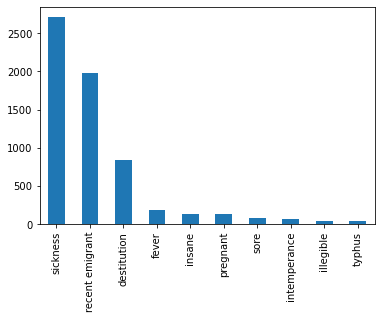

In [14]:
bellevue_df['disease'].value_counts()[:10].plot(kind='bar')

### ❓🧐  Where were most people sent?

In [55]:
bellevue_df['sent_to'].value_counts()[:10]

Hospital                    3882
Blackwell's Island           571
Bellevue Garret              250
Randall's Island             172
Shanty                       109
Lunatic Asylum                93
CHECK                         90
Bellevue Hospital Chapel      78
Almshouse                     64
Hospital Ward 38              62
Name: sent_to, dtype: int64

## Examine Subsets

### ❓🧐  Why were people being sent to Hostpital Ward 38?

To explore this question, we can filter rows with a condition.

In [56]:
bellevue_df['sent_to'] == 'Hospital Ward 38'

0       False
1       False
2       False
3       False
4       False
        ...  
9593    False
9594     True
9595    False
9596    False
9597    False
Name: sent_to, Length: 9598, dtype: bool

In [59]:
bellevue_df[bellevue_df['sent_to'] == 'Hospital Ward 38']

,date_in,first_name,last_name,full_name,age,gender,disease,profession,children,sent_to,admittor1,admittor2,ship,ship_city_departed
249,1847-05-17,Elizabeth,Cauley,Elizabeth Cauley,24.0,f,recent emigrant,married,Son Walter 4 mo,Hospital Ward 38,moses g. leonard,peter c. johnston,CHARLOTTE,BREMEN
330,1847-03-22,Sarah,Corrigan,Sarah Corrigan,21.0,f,recent emigrant,married,NaN,Hospital Ward 38,george w. anderson,peter c. johnston,ADIRONDACK,LIVERPOOL
367,1847-06-13,Bridget,Reynolds,Bridget Reynolds,20.0,f,pregnant,married,NaN,Hospital Ward 38,moses g. leonard,oscar s. field,NaN,NaN
499,1847-06-09,Rose,Dinns,Rose Dinns,22.0,f,pregnant,married,NaN,Hospital Ward 38,moses g. leonard,peter c. johnston,ATLAS,LIVERPOOL
698,1847-08-21,Bridget,Redding,Bridget Redding,25.0,f,pregnant,married,NaN,Hospital Ward 38,william w. lyons,NaN,COLUMBIA,LIVERPOOL
1041,1847-03-13,Betty,Dunn,Betty Dunn,34.0,f,recent emigrant,married,NaN,Hospital Ward 38,george w. anderson,peter c. johnston,FINLAND,LIVERPOOL
1290,1847-02-17,Catherine,Doherty,Catherine Doherty,34.0,f,recent emigrant,widow,NaN,Hospital Ward 38,george w. anderson,NaN,NaN,NaN
1426,1847-05-31,Catherine,Riley,Catherine Riley,28.0,f,recent emigrant,married,NaN,Hospital Ward 38,moses g. leonard,peter c. johnston,NaN,NaN
1494,1847-06-14,Brigt,Frikee?,Brigt Frikee?,25.0,f,recent emigrant,married,NaN,Hospital Ward 38,moses g. leonard,peter c. johnston,NaN,NaN
1584,1847-10-28,Ellen,Lamb,Ellen Lamb,20.0,f,recent emigrant,married,NaN,Hospital Ward 38,william w. lyons,NaN,NaN,NaN


In [61]:
bellevue_df[bellevue_df['sent_to'] == 'Hospital Ward 38']['disease'].value_counts()

pregnant           49
recent emigrant    10
destitution         1
sickness            1
Name: disease, dtype: int64

## Examine Missing Data

### ❓🧐  How many people had children with them?

To find out how many people had children with them, we can use the `.count()` method. The `.count()` method will tell us how many not blank rows are in a given column. 

In [52]:
bellevue_df['children'].count()

37

To calculate the total number of rows in a column, we can use the `len()` function.

In [53]:
len(bellevue_df['children'])

9598

To calculate the percentage of rows in the dataset that contain values for the column "children," we can thus divide the number of non-blank values by the total number of rows in the column. 

In [20]:
bellevue_df['children'].count() / len(bellevue_df['children'])

0.0038549697853719526

### ❓🧐  How much do we know about people in general?

In [16]:
bellevue_df.count() / len(bellevue_df)

date_in       1.000000
first_name    0.999583
last_name     1.000000
full_name     1.000000
age           0.994791
gender        1.000000
disease       0.678162
profession    0.893832
children      0.003855
sent_to       0.590331
sender1       0.991977
sender2       0.543030
dtype: float64

### ❓🧐  What data is missing? What data do you wish we had?